In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 


<class 'numpy.ndarray'>


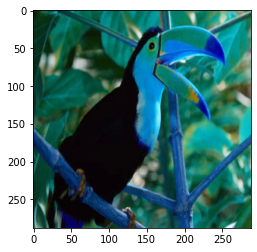

In [4]:
image_path = '/home/anis/Desktop/AI/MultiSPE/testsets/Set5/GTmod12/bird.png'
image1 = cv2.imread(image_path)
print(type(image1))
plt.imshow(image1)

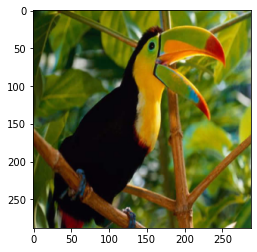

In [3]:
image_correct = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image_correct)

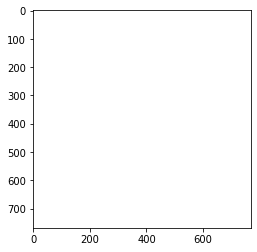

In [4]:
image_blank = np.ones(shape = (768, 768, 3))
plt.imshow(image_blank)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


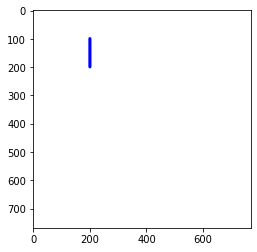

In [32]:
cv2.line(
   image_blank,
   pt1 = (200, 100), pt2 = (200, 200),
   color = (0, 0, 255),
   thickness = 10
)
plt.imshow(image_blank)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


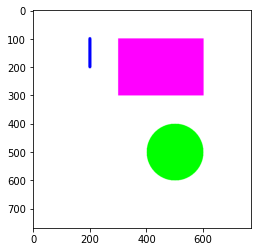

In [36]:
cv2.rectangle(
   image_blank,
   pt1 = (300, 100), pt2 = (600, 300),
   color = (255, 0, 255),
   thickness = -1
)
plt.imshow(image_blank)

In [ ]:
cv2.circle(
   image_blank,
   center = (500, 500),
   radius = 50,
   color = (0, 255, 0),
   thickness = -1
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 2)
(5, 1, 2)


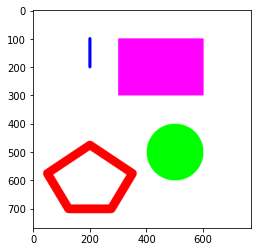

In [38]:
pol_vert = np.array([
   [200, 475],
   [50, 575],
   [125, 700],
   [275, 700],
   [350, 575]
])
print(pol_vert.shape)

(5, 2)

pol_vert = pol_vert.reshape((-1, 1, 2))
print(pol_vert.shape)

(5, 1, 2)

cv2.polylines(
   image_blank,
   [pol_vert],
   isClosed = True,
   color = (255, 0, 0),
   thickness = 30
)
plt.imshow(image_blank)

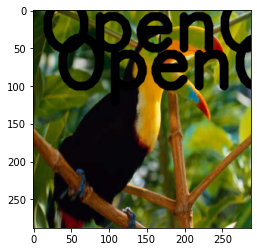

In [157]:
text_font = cv2.FONT_ITALIC
cv2.putText(
   image_correct,
   text = "OpenCV",
   org = (10, 50),
   fontFace = text_font,
   fontScale = 3,
   lineType = cv2.LINE_AA,
   color = (0, 0, 0),
   thickness = 1
)
plt.imshow(image_correct)

In [123]:
from random import randint

class AddMaskFace(object):
    """Convert ndarrays in sample to Tensors."""
    def __init__(self, output_size=256):
        assert isinstance(output_size, int)
        self.output_size = output_size
        self.masks = [self.line,self.rectangle,self.circle]

    def __call__(self, image):

        idx = randint(0,2)
        img_L = self.masks[0](image)
        for i in range(randint(1,4)):
            img_L = self.masks[2](img_L)

        return img_L

    def line(self,image):
        offset = self.output_size / 9
        s_h = randint(offset,self.output_size-offset)
        s_w = randint(offset,self.output_size-offset)
        e_h = randint(s_h,self.output_size-offset)
        e_w = randint(s_w,self.output_size-offset)

        img =cv2.line(
            image,
            pt1 = (s_w, s_h), pt2 = (e_w, e_h),
            color = (255, 255, 255),
            thickness = randint(5,20))
        return  img
    
    def rectangle(self,image):
        s_h = randint(0,int(self.output_size/3)-10)
        s_w = randint(0,int(self.output_size/3)-10)
        e_h = randint(s_h,int(self.output_size/3))
        e_w = randint(s_w,int(self.output_size/3))
        
        img_masked = cv2.rectangle(
                image,
                pt1 = (s_w, s_h), pt2 = (e_w, e_h),
                color = (0, 0, 0),
                thickness = -1)


        return img_masked 

    def circle(self,image):
        s_h = randint(self.output_size/2-(self.output_size/3),self.output_size-10)
        s_w = randint(self.output_size/2-(self.output_size/3),self.output_size-10)
        raduis = randint(5,int(min(self.output_size - max(s_h,s_w),self.output_size/20)))
        
        img =cv2.circle(
                    image,
                    center = (s_w, s_h),
                    radius = raduis,
                    color = (255, 255, 255),
                    thickness = -1
                    )

        return  img 



(288, 288, 3)


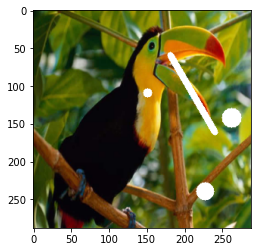

In [130]:
image_correct = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
masks = AddMaskFace(image_correct.shape[1])
image = masks(image_correct)
print(np.shape(image))
plt.imshow(image)

In [10]:
from utils.utils_blindsr import random_crop
import random

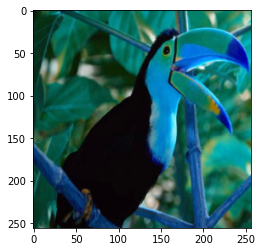

In [11]:
img = cv2.resize(image1, (int(1/4*image1.shape[1]), int(1/4*image1.shape[0])), interpolation=random.choice([1, 2, 3]))

img,hq = random_crop(img,image1)
plt.imshow(hq)

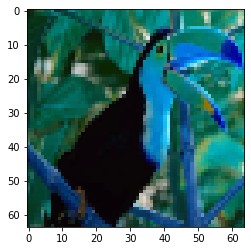

In [12]:
plt.imshow(img)